# Interacting AMMs Model

In [1]:
%load_ext autotime

time: 771 µs (started: 2021-05-07 18:11:45 -03:00)


In [2]:
import sys
sys.path.append("..")

time: 678 µs (started: 2021-05-07 18:11:45 -03:00)


In [3]:
import plotly.express as px
import pandas as pd
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=False)

time: 514 ms (started: 2021-05-07 18:11:45 -03:00)


In [4]:
# %%


from cadCAD_tools import easy_run

from interacting_amm_model import initial_state, params
from interacting_amm_model import timestep_block, N_timesteps, N_samples

results = (easy_run(initial_state,
                    params,
                    timestep_block,
                    N_timesteps,
                    N_samples,
                    assign_params=False)
           .reset_index())


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 3
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (150, 4, 5, 2)
Execution Method: local_simulations
SimIDs   : [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
SubsetIDs: [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
Ns       : [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]
ExpIDs   : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Execution Mode: parallelized
Total execution time: 0.74s
time: 786 ms (started: 2021-05-07 18:11:46 -03:00)


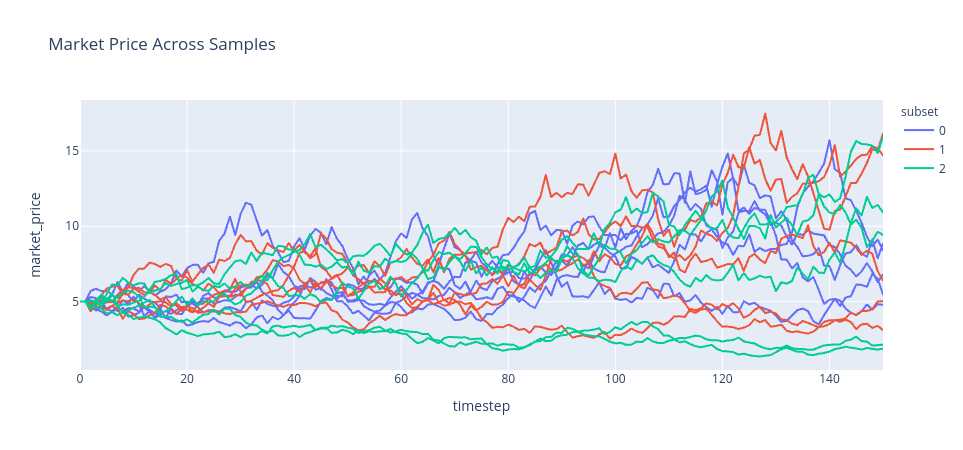

time: 209 ms (started: 2021-05-07 18:11:47 -03:00)


In [5]:
px.line(results,
        x='timestep',
        y='market_price',
        line_group='run',
        color='subset',
        title='Market Price Across Samples')

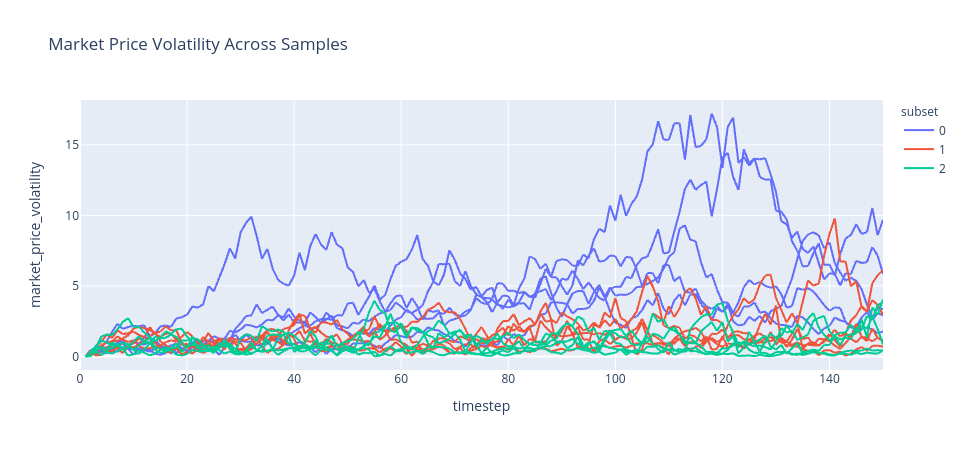

time: 97.6 ms (started: 2021-05-07 18:11:47 -03:00)


In [6]:
px.line(results,
        x='timestep',
        y='market_price_volatility',
        line_group='run',
        color='subset',
        title='Market Price Volatility Across Samples')

In [7]:
from interacting_amm_model.model import amms

for amm in amms:
    amm_df = pd.DataFrame(results.pair_state
                          .map(lambda s: s[amm.label])
                          .tolist()
                          )

    amm_df = amm_df.add_prefix(f"{amm.label}_")
    results = results.join(amm_df)

time: 73.3 ms (started: 2021-05-07 18:11:47 -03:00)


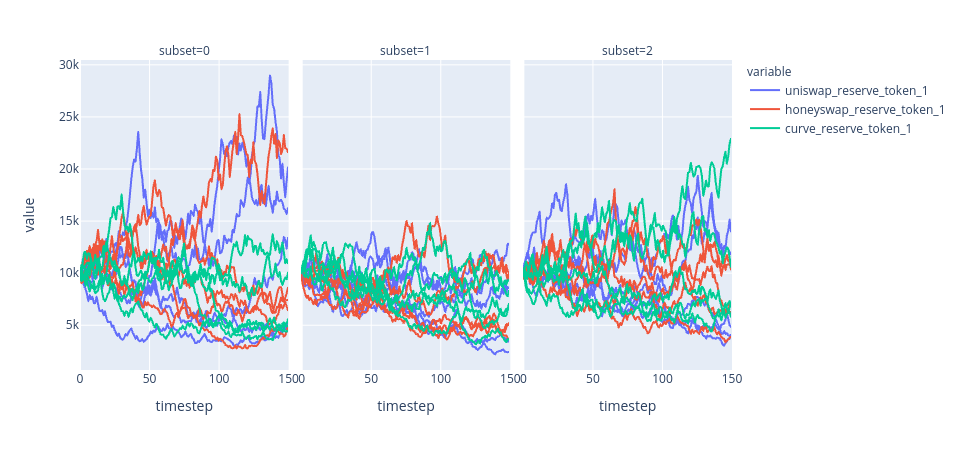

time: 291 ms (started: 2021-05-07 18:11:47 -03:00)


In [8]:
y_cols = [f"{amm.label}_reserve_token_1" for amm in amms]

px.line(results,
        x='timestep',
        y=y_cols,
        facet_col='subset',
        line_group='run')

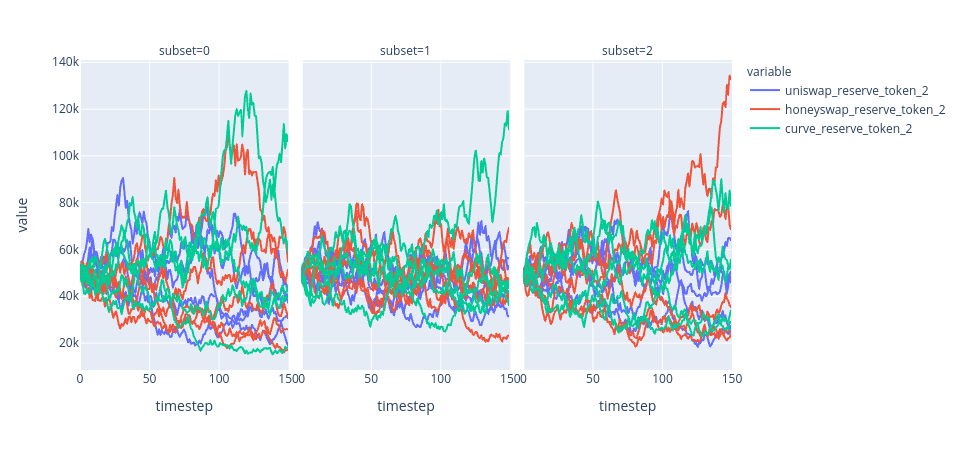

time: 417 ms (started: 2021-05-07 18:11:47 -03:00)


In [9]:
y_cols = [f"{amm.label}_reserve_token_2" for amm in amms]

fig = px.line(results,
              x='timestep',
              y=y_cols,
              facet_col='subset',
              line_group='run')

fig.show()